In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

## Comecamos com a leitura de data frames e a limpar os mesmos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
df = pd.read_csv('cities_internet_prices_historical.24-10-2021.csv')
df2 = pd.read_csv('GDP.csv')
df3 = pd.read_excel('literacy.xls')
df4 = pd.read_excel('internet_acess.xls')
df5 = pd.read_csv('eletricity.csv')
df6 = pd.read_excel('Foreign_Exchange_Rates.xlsx')
df7 = pd.read_excel('celular.xls')

In [3]:
#Cria o Dataframe dos precos medios de internet no ano de 2018
internet = df.groupby('Country').mean() #media dos valores das cidades em cada pais
minimo = 0.1
 #Remove valores zerados
internet = internet.dropna() #Remove Valores NaN
indexes = internet.loc[internet['Internet Price, 2015']==0].index
internet = internet['Internet Price, 2015'].drop(indexes).to_frame()
lista_net = internet.index.tolist()

In [4]:
#Cria Dataframes do PIB por capita do ano de 2018
gdp_sujo = (df2[['Country ','2015']]) #Remove valores NaN de pib
lista_gdp = gdp_sujo['Country '].tolist()

In [5]:
df3 = df3.groupby('Data Source').mean()
df3 = df3.iloc[:,-6:-5].dropna()
lista_literacy = df3.index.tolist()
lista_literacy
df3

,Unnamed: 59
Data Source,
Antigua and Barbuda,98.400002
Arab World,80.810028
Argentina,99.148247
Azerbaijan,99.862633
Bangladesh,68.055359
...,...
Uruguay,98.145920
Uzbekistan,99.992043
"Venezuela, RB",96.651077


In [6]:
df4 = df4.groupby('Data Source').mean()
acess_sujo = df4.iloc[:,-6:-5].dropna()
lista_acess = acess_sujo.index.tolist()
lista_acess 


['Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Country Name',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 

In [7]:
df5 = pd.read_csv('eletricity.csv')
eletricity = df5.iloc[31:37,0:3].transpose().iloc[2:3]
eletricity.columns = ['2010', '2011','2012','2013','2014','2015']


In [8]:
conversao = df6


listaANO = []
for data in conversao['Time Serie']:
    if data[2] =="0" and data[3] == '0':
        listaANO.append(2000)
    elif data[2] =="0" and data[3] == '1':
        listaANO.append(2001)
    elif data[2] =="0" and data[3] == '2':
        listaANO.append(2002)
    elif data[2] =="0" and data[3] == '3':
        listaANO.append(2003)
    elif data[2] =="0" and data[3] == '4':
        listaANO.append(2004)
    elif data[2] =="0" and data[3] == '5':
        listaANO.append(2005)
    elif data[2] =="0" and data[3] == '6':
        listaANO.append(2006)
    elif data[2] =="0" and data[3] == '7':
        listaANO.append(2007)
    elif data[2] =="0" and data[3] == '8':
        listaANO.append(2008)
    elif data[2] =="0" and data[3] == '9':
        listaANO.append(2009)
    elif data[2] =="1" and data[3] == '0':
        listaANO.append(2010)
    elif data[2] =="1" and data[3] == '1':
        listaANO.append(2011)
    elif data[2] =="1" and data[3] == '2':
        listaANO.append(2012)
    elif data[2] =="1" and data[3] == '3':
        listaANO.append(2013)
    elif data[2] =="1" and data[3] == '4':
        listaANO.append(2014)
    elif data[2] =="1" and data[3] == '5':
        listaANO.append(2015)
    elif data[2] =="1" and data[3] == '6':
        listaANO.append(2016)
    elif data[2] =="1" and data[3] == '7':
        listaANO.append(2017)
    elif data[2] =="1" and data[3] == '8':
        listaANO.append(2018)
    elif data[2] =="1" and data[3] == '9':
        listaANO.append(2019)
        

conversao['Ano'] = listaANO
for coluna in conversao.columns.tolist():
    tiro = conversao.loc[conversao[coluna] == 'ND'].index
    conversao = conversao.drop(tiro)
new = conversao.loc[conversao['Ano']==2015].transpose()
dolar_sujo = new[4033].to_frame().drop(['Ano','Time Serie'])

lista_din = dolar_sujo.index.to_list()
lista_dola = []
for doleta in lista_din: 
    pala = ''
    for letra in doleta:
        if letra != '-':
            pala += letra.lower()
        else:
            break
            
    primeira = pala[0].upper()
    lista_dola.append(primeira + pala[1:-1])
dolar_sujo['Country'] = lista_dola

In [9]:
celular = df7[['2015','Country Name']].groupby('Country Name').mean()
lista_cel = celular.index.to_list()
lista_cel

['Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',

In [10]:
#LISTA OS PAISES PRESENTES EM TODOS OS DATAFRAMES
lista_paises = [lista_net,lista_gdp,lista_acess,lista_literacy,lista_dola,lista_cel]
lista_pais = []
europe = ['Belgium','Bosnia and Herzegovina','Croatia','Cyprus','Czech Republic','Estonia',
'Finland', 'France','Germany','Iceland','Italy','Luxembourg','Montenegro','Morocco',
'Norway','Poland', 'Portugal', 'Qatar', 'Romania','Serbia','Spain','Sweden', 'Switzerland']
europe2 = ['Belgium','Croatia','Cyprus','Estonia',
'Finland', 'France','Germany','Italy','Luxembourg','Montenegro', 'Portugal','Spain']
lista_certo = []
lista_erro1 = []
lista_erro = []
for lista in lista_paises :   
    for pais in lista:
        if pais in lista_net :
            if pais in lista_gdp:
                if pais in lista_acess:
                    if (pais in lista_literacy) or (pais in europe):
                        if (pais in lista_cel) or (pais in europe):
                            if pais not in lista_pais:
                                lista_pais.append(pais)
        else:
            ''
for pais2 in lista_pais:
    if pais2 in lista_dola:
        if pais2 not in lista_certo:
            lista_certo.append(pais2)
    if pais2 in europe2:
        if pais2 not in lista_certo:
            lista_certo.append(pais2)
    else:
        lista_erro1.append(pais2)

In [11]:
#FAZ UMA LISTA DE VALORES DE CADA DATAFRAME
net = pd.DataFrame()
gdp = pd.DataFrame()
acess = pd.DataFrame()
literacy = pd.DataFrame()
dolar = pd.DataFrame()
celulares = pd.DataFrame()
for certo in lista_certo:
    net[certo] = internet.transpose()[certo]
    gdp[certo] = gdp_sujo.loc[gdp_sujo['Country '] == certo].transpose()
    acess[certo] = acess_sujo.transpose()[certo]
    if certo in lista_literacy:
        literacy[certo] = df3.transpose()[certo]
    else :
        literacy[certo] = df3.transpose()['Europe & Central Asia']
    if certo in lista_dola:
        dolar[certo] = dolar_sujo.loc[dolar_sujo['Country'] == certo].transpose()
    else:
        dolar[certo] = dolar_sujo.transpose()['EURO AREA - EURO/US$']
    if certo in lista_cel:
        celulares[certo] = celular.transpose()[certo]
    else:
        celulares[certo] = celular.transpose()['Europe & Central Asia']
        
        
net  = net.transpose()['Internet Price, 2015'].to_list()
gdp  = gdp.transpose()['2015'].to_list()
acess = acess.transpose()
acess.columns = ['acess']
acess = acess['acess'].to_list()
literacy = literacy.transpose()
literacy.columns = ['literacy']
literacy = literacy['literacy'].to_list()
dolar = dolar.transpose()[4033].to_frame()
dolar.columns = ['dolar']
dolar = dolar['dolar'].to_list()
celulares = celulares.transpose()
celulares.columns= ['celulares']
celulares = celulares['celulares'].to_list()

In [12]:
print('------------------------------------------------------------TARGET-------------------------------------------------------------')
print('NET')
display(net)
print('------------------------------------------------------------FEATURES-----------------------------------------------------------')
print('GDP')
display(gdp)
print('Literacy(%)')
display(literacy)
print('Dolar($/R$)')
display(dolar)
print('Internet Acess')
display(acess)
print('Quantidade celulares')
display(celulares)


------------------------------------------------------------TARGET-------------------------------------------------------------
NET


[22.34109864826,
 15.000437669173229,
 13.039091230412945,
 27.15681404205993,
 15.75878220140515,
 12.11861692104768,
 17.132360342608816,
 14.759530402441717,
 7.053637467571894,
 43.9587128111718,
 14.769500875059618,
 25.1366120218579,
 42.6860910551709,
 12.219172600320134,
 30.8022545301306,
 24.592639964771116,
 17.509128231045867,
 56.43009756479575,
 19.288839451242126]

------------------------------------------------------------FEATURES-----------------------------------------------------------
GDP


[46213.26653,
 15813.85544,
 23013.62205,
 31722.36651,
 29397.12984,
 42535.47517,
 40833.24207,
 47683.7886,
 36909.32837,
 103750.7751,
 18284.88284,
 16337.25379,
 60385.11676,
 29668.8592,
 89007.4608,
 34912.47613,
 48975.00451,
 63938.98939,
 16293.6098]

Literacy(%)


[98.7357482910156,
 91.7251586914063,
 98.7357482910156,
 98.7357482910156,
 98.7357482910156,
 98.7357482910156,
 98.7357482910156,
 98.7357482910156,
 98.7357482910156,
 98.7357482910156,
 95.5493316650391,
 98.7357482910156,
 98.7357482910156,
 98.7357482910156,
 98.5595703125,
 98.7708892822266,
 98.7357482910156,
 98.7357482910156,
 94.6591186523438]

Dolar($/R$)


[0.8769,
 3.0405,
 0.8769,
 0.8769,
 0.8769,
 0.8769,
 0.8769,
 0.8769,
 0.8769,
 0.8769,
 15.271,
 0.8769,
 7.7561,
 0.8769,
 1.3316,
 0.8769,
 8.1076,
 0.9196,
 33.61]

Internet Acess


[85.05294175,
 58.32795173,
 69.84503592,
 71.71574092,
 88.4097035,
 86.42213333,
 78.00603771,
 87.58979935,
 58.14173496,
 96.37671417,
 57.43104299,
 68.11978601,
 96.81032569,
 68.63286148,
 79.012957,
 78.68963187,
 90.61019664,
 87.4790556,
 39.31612674]

Quantidade celulares


[12774090.0,
 257814274.0,
 4415660.0,
 1111123.0,
 1903545.0,
 7396200.0,
 66681000.0,
 96360000.0,
 87691238.0,
 806800.0,
 107688282.0,
 1007890.0,
 5714890.0,
 11714693.0,
 8233100.0,
 51067770.0,
 12638827.0,
 11243210.0,
 102942000.0]

In [13]:
#JUNTA TUDO EM UM DATAFRAME
tudo = pd.DataFrame()
tudo['net'] = net
tudo['gdp'] = gdp
tudo['literacy'] = literacy
tudo['acess'] = acess
tudo['dolar'] = dolar
tudo['celulares'] = celulares
tudo

,net,gdp,literacy,acess,dolar,celulares
0,22.341099,46213.26653,98.735748,85.052942,0.8769,12774090.0
1,15.000438,15813.85544,91.725159,58.327952,3.0405,257814274.0
2,13.039091,23013.62205,98.735748,69.845036,0.8769,4415660.0
3,27.156814,31722.36651,98.735748,71.715741,0.8769,1111123.0
4,15.758782,29397.12984,98.735748,88.409704,0.8769,1903545.0
5,12.118617,42535.47517,98.735748,86.422133,0.8769,7396200.0
6,17.132360,40833.24207,98.735748,78.006038,0.8769,66681000.0
7,14.759530,47683.78860,98.735748,87.589799,0.8769,96360000.0
8,7.053637,36909.32837,98.735748,58.141735,0.8769,87691238.0
9,43.958713,103750.77510,98.735748,96.376714,0.8769,806800.0


In [14]:
import seaborn as sns

In [15]:
tudo.corr()

,net,gdp,literacy,acess,dolar,celulares
net,1.000000,0.643186,0.210484,0.476349,-0.074865,-0.359630
gdp,0.643186,1.000000,0.430842,0.676988,-0.296723,-0.412587
literacy,0.210484,0.430842,1.000000,0.639546,-0.530031,-0.869106
acess,0.476349,0.676988,0.639546,1.000000,-0.570767,-0.564404
dolar,-0.074865,-0.296723,-0.530031,-0.570767,1.000000,0.293498
celulares,-0.359630,-0.412587,-0.869106,-0.564404,0.293498,1.000000


#### Aqui calculamos as correlação entre o target e os features 
Com base nos valores obtidos vemos que o nosso target <b>PREÇO DA INTERNET EM 2015 (net)</b>, tem uma correlação moderada e positiva com o PIB do pais e com o acesso de internet no pais. Agora tem uma associação negativa moderada com a quantidade de celulares presentes. Em relação a taxa de afalbetismo no pais e a cotação do dolar no mesmo, há uma correlação fraca presente entre eles. Abaixo podemos ver o histograma de cada feature ou target na diagonal principal (Graficos com colunas). E também podemos ver o grafico de disperção entre cada um dos elementos, dando enfase nos graficos que envolvem a variavel <b>net</b> uma vez que ela é nossa target e com esses graficos conseguimos ver a existencia de uma relação entre a target e uma feature

<IPython.core.display.Javascript object>


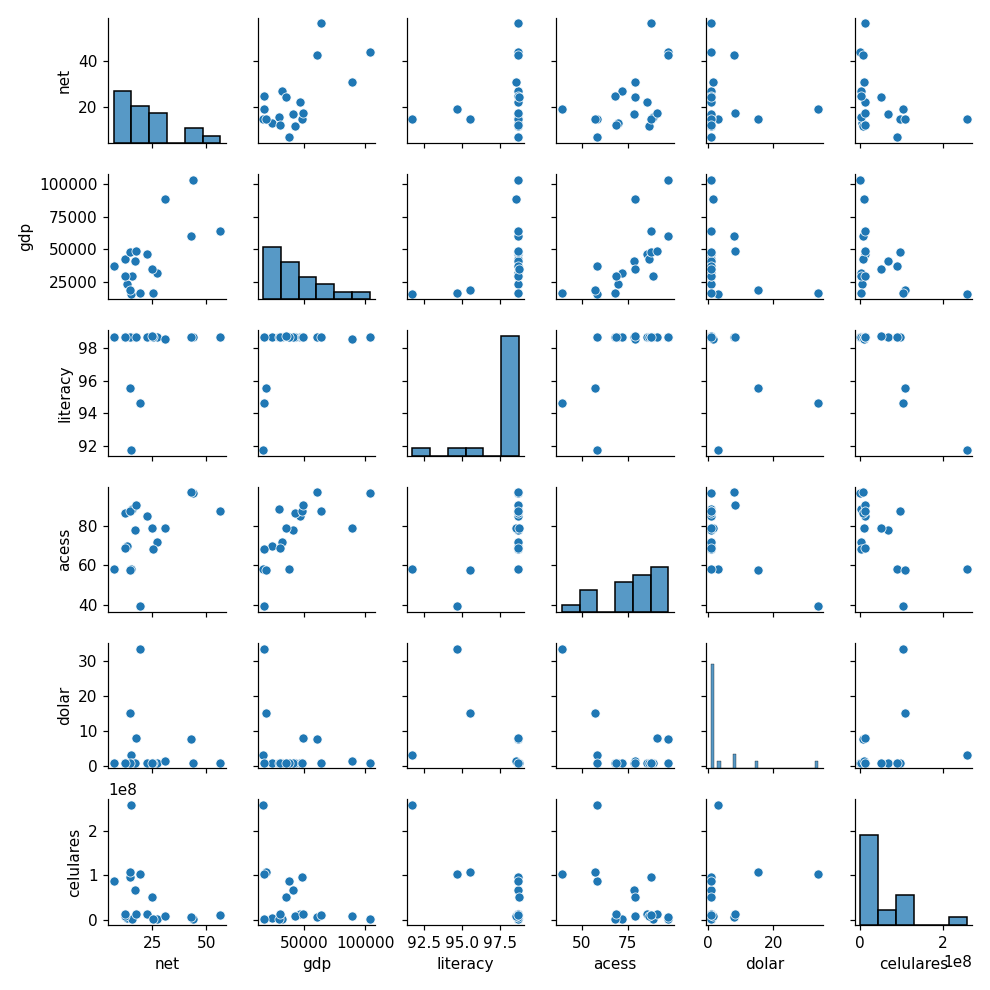

In [16]:
sns.pairplot(tudo, height=1.5); 

In [17]:
#CRIAÇÃO DA FUNÇÃO DE REGRESSO LINEAR
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results
X = tudo[['gdp', 'literacy', 'dolar',
       'acess', 'celulares']]
Y = tudo['net']

In [18]:
#APRESENTAÇÃO DE RESULTADOS
results = regress(Y,X)
results.summary()

C:\Users\caiog\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    net   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     2.906
Date:                Tue, 23 Nov 2021   Prob (F-statistic):             0.0562
Time:                        14:41:20   Log-Likelihood:                -67.751
No. Observations:                  19   AIC:                             147.5
Df Residuals:                      13   BIC:                             153.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        447.0070    316.916      1.410      0.182    -237.649    1131.663
gdp            0.0003      0.000      2.100      0.056   -8.45e-06       0.001
literacy      -4.5375      3.203     -1.417      0.180     -11.458       2.383
dolar          0.0447      0.428      0.105      0.918      -0.879       0.969
acess          0.1733      0.278      0.624      0.544      -0.427       0.773
celulares  -1.205e-07   8.46e-08     -1.425      0.178   -3.03e-07    6.23e-08
==============================================================================
Omnibus:                        8.325   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.498
Skew:                           1.095   Prob(JB):                       0.0640
Kurtosis:                       4.465   Cond. No.                     1.03e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### APRESENTAÇÃO DOS RESULTADOS DA PRIMEIRA REGRESSAO
Com base os resultados acimas, vemos que o mesmo apresenta que o a taxa de cambio (<b>dolar</b>) e o acesso de internet (<b>acess</b>), não apresentam uma boa influencia, assim decidimos comecar tirando o dolar, que apresenta o maior P>|t|

In [19]:
X2 = tudo[['gdp', 'literacy', 'celulares','acess']]
Y2 = tudo['net']

results2 = regress(Y2,X2)
results2.summary()

C:\Users\caiog\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    net   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3.906
Date:                Tue, 23 Nov 2021   Prob (F-statistic):             0.0247
Time:                        14:41:20   Log-Likelihood:                -67.759
No. Observations:                  19   AIC:                             145.5
Df Residuals:                      14   BIC:                             150.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        464.2171    261.105      1.778      0.097     -95.797    1024.231
gdp            0.0003      0.000      2.210      0.044    8.72e-06       0.001
literacy      -4.7013      2.693     -1.745      0.103     -10.478       1.076
celulares  -1.243e-07   7.37e-08     -1.687      0.114   -2.82e-07    3.38e-08
acess          0.1618      0.246      0.658      0.521      -0.366       0.689
==============================================================================
Omnibus:                        8.150   Durbin-Watson:                   2.364
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                5.330
Skew:                           1.085   Prob(JB):                       0.0696
Kurtosis:                       4.422   Cond. No.                     8.82e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### APRESENTAÇÃO DOS RESULTADOS DA SEGUNDA REGRESSAO
Com base os resultados acimas, vemos que o mesmo apresenta que o acesso de internet (<b>acess</b>), não apresenta uma boa influencia, assim decidimos retirar o mesmo do modelo, ja que o acesso apresenta o maior P>|t|

In [20]:
X3 = tudo[['gdp', 'literacy', 'celulares']]
Y3 = tudo['net']

results3 = regress(Y3,X3)
results3.summary()

C:\Users\caiog\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    net   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     5.263
Date:                Tue, 23 Nov 2021   Prob (F-statistic):             0.0111
Time:                        14:41:20   Log-Likelihood:                -68.048
No. Observations:                  19   AIC:                             144.1
Df Residuals:                      15   BIC:                             147.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        415.4317    245.571      1.692      0.111    -107.990     938.853
gdp            0.0003      0.000      3.240      0.005       0.000       0.001
literacy      -4.1002      2.485     -1.650      0.120      -9.398       1.197
celulares  -1.227e-07   7.23e-08     -1.698      0.110   -2.77e-07    3.13e-08
==============================================================================
Omnibus:                        8.582   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                5.738
Skew:                           1.165   Prob(JB):                       0.0568
Kurtosis:                       4.349   Cond. No.                     8.45e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.45e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### APRESENTAÇÃO DOS RESULTADOS DA TERCEIRA REGRESSAO
Com base os resultados acimas, vemos que todos os features apresentam um P>|t| abaixo de 15%, assim temos um modelo no qual leva em consideração apenas o PIB do pias, a porcentagem de pessoas alfabetizadas e a quantidade de celulares no pais. Mas com uma precisão maior comparada ao inicio do modelo.

# Avaliando os resultados:

## R-squared: O R^2 é uma estatística que indica a porcentagem da variância na variável dependente (target) que as variáveis ​​independentes (features) explicam coletivamente. Um R^2 baixo representa um modelo que falha em explicar ou explica pouca variação da variável target em torno de sua média.  Um R^2 alto representa um modelo que explica toda ou quase toda a variação da variável target em torno de sua média. Como nosso R^2 foi de 0.513 isso nos leva a concluir que o modelo explica pouco mais da metade da variação da variável target em torno de sua média.